# <font color=blue>Supervised Learning with scikit-learn</font> 

At the end of day, the value of Data Scientists rests on their ability to describe the world and to make predictions. Machine Learning is the field of teaching machines and computers to learn from existing data to make predictions on new data - will a given tumor be benign or malignant? Which of your customers will take their business elsewhere? Is a particular email spam or not? In this course, you'll learn how to use Python to perform supervised learning, an essential component of Machine Learning. You'll learn how to build predictive models, how to tune their parameters and how to tell how well they will perform on unseen data, all the while using real world datasets. You'll do so using scikit-learn, one of the most popular and user-friendly machine learning libraries for Python.

## <font color=red>01 - Classification </font> 

 In this chapter, you will be introduced to classification problems and learn how to solve them using supervised learning techniques. Classification problems are prevalent in a variety of domains, ranging from finance to healthcare. Here, you will have the chance to apply what you are learning to a political dataset, where you classify the party affiliation of United States Congressmen based on their voting records. 

<div class="dc-u-p-24"><h1 class="dc-h3">Which of these is a classification problem?</h1>
    <div class=""><p><p>Once you decide to leverage supervised machine learning to solve a new problem, you need to identify whether your problem
is better suited to classification or regression. This exercise will help you develop your intuition for distinguishing between the two.</p>
<p>Provided below are 4 example applications of machine learning. Which of them is a supervised classification problem?</p></div>

Possible Answers

- __Using labeled financial data to predict whether the value of a stock will go up or go down next week.__
- Using labeled housing price data to predict the price of a new house based on various features.
- Using unlabeled data to cluster the students of an online education company into different categories based on their learning styles.
- Using labeled financial data to predict what the value of a stock will be next week.

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Numerical EDA</h1><p>In this chapter, you'll be working with a dataset obtained from the <a href="https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records" target="_blank">UCI Machine Learning Repository</a> consisting of votes made by US House of Representatives Congressmen. Your goal will be to predict their party affiliation ('Democrat' or 'Republican') based on how they voted on certain key issues. Here, it's worth noting that we have preprocessed this dataset to deal with missing values. This is so that your focus can be directed towards understanding how to train and evaluate supervised learning models. Once you have mastered these fundamentals, you will be introduced to preprocessing techniques in Chapter 4 and have the chance to apply them there yourself - including on this very same dataset!</p>
<p>Before thinking about what supervised learning models you can apply to this, however, you need to perform Exploratory data analysis (EDA) in order to understand the structure of the data. For a refresher on the importance of EDA, check out the first two chapters of <a href="https://www.datacamp.com/courses/statistical-thinking-in-python-part-1" target="_blank">Statistical Thinking in Python (Part 1)</a>. </p>
<p>Get started with your EDA now by exploring this voting records dataset numerically. It has been pre-loaded for you into a DataFrame called <code>df</code>.  Use pandas' <code>.head()</code>, <code>.info()</code>, and <code>.describe()</code> methods in the IPython Shell to explore the DataFrame, and select the statement below that is <strong>not</strong> true.</p></div></div></div>

In [1]:
import pandas as pd
df_all = pd.read_csv('./data/house-votes-84 - NAN.csv', header=None)
df = df_all.dropna()
df.columns= ['party', 'infants', 'water', 'budget', 'physician', 'salvador',
       'religious', 'satellite', 'aid', 'missile', 'immigration', 'synfuels',
       'education', 'superfund', 'crime', 'duty_free_exports', 'eaa_rsa']

In [2]:
df.head()

party  infants  water  budget  physician  salvador  religious  \
5     democrat      0.0    1.0     1.0        0.0       1.0        1.0   
8   republica0      0.0    1.0     0.0        1.0       1.0        1.0   
19    democrat      1.0    1.0     1.0        0.0       0.0        0.0   
23    democrat      1.0    1.0     1.0        0.0       0.0        0.0   
25    democrat      1.0    0.0     1.0        0.0       0.0        0.0   

    satellite  aid  missile  immigration  synfuels  education  superfund  \
5         0.0  0.0      0.0          0.0       0.0        0.0        1.0   
8         0.0  0.0      0.0          0.0       0.0        1.0        1.0   
19        1.0  1.0      1.0          0.0       1.0        0.0        0.0   
23        1.0  1.0      1.0          0.0       0.0        0.0        0.0   
25        1.0  1.0      1.0          1.0       0.0        0.0        0.0   

    crime  duty_free_exports  eaa_rsa  
5     1.0                1.0      1.0  
8     1.0                0.0      1.0  
19    0.0                1.0      1.0  
23    0.0                1.0      1.0  
25    0.0                1.0      1.0

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 232 entries, 5 to 431
Data columns (total 17 columns):
party                232 non-null object
infants              232 non-null float64
water                232 non-null float64
budget               232 non-null float64
physician            232 non-null float64
salvador             232 non-null float64
religious            232 non-null float64
satellite            232 non-null float64
aid                  232 non-null float64
missile              232 non-null float64
immigration          232 non-null float64
synfuels             232 non-null float64
education            232 non-null float64
superfund            232 non-null float64
crime                232 non-null float64
duty_free_exports    232 non-null float64
eaa_rsa              232 non-null float64
dtypes: float64(16), object(1)
memory usage: 32.6+ KB


In [4]:
df.describe()

infants       water      budget   physician    salvador   religious  \
count  232.000000  232.000000  232.000000  232.000000  232.000000  232.000000   
mean     0.413793    0.461207    0.530172    0.487069    0.551724    0.642241   
std      0.493577    0.499571    0.500168    0.500913    0.498393    0.480377   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    1.000000    0.000000    1.000000    1.000000   
75%      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        satellite         aid     missile  immigration    synfuels  \
count  232.000000  232.000000  232.000000   232.000000  232.000000   
mean     0.534483    0.512931    0.487069     0.551724    0.344828   
std      0.499888    0.500913    0.500913     0.498393    0.476340   
min      0.000000    0.000000    0.000000     0.000000    0.000000   
25%      0.000000    0.000000    0.000000     0.000000    0.000000   
50%      1.000000    1.000000    0.000000     1.000000    0.000000   
75%      1.000000    1.000000    1.000000     1.000000    1.000000   
max      1.000000    1.000000    1.000000     1.000000    1.000000   

        education   superfund       crime  duty_free_exports     eaa_rsa  
count  232.000000  232.000000  232.000000         232.000000  232.000000  
mean     0.465517    0.547414    0.642241           0.370690    0.814655  
std      0.499888    0.498823    0.480377           0.484034    0.389417  
min      0.000000    0.000000    0.000000           0.000000    0.000000  
25%      0.000000    0.000000    0.000000           0.000000    1.000000  
50%      0.000000    1.000000    1.000000           0.000000    1.000000  
75%      1.000000    1.000000    1.000000           1.000000    1.000000  
max      1.000000    1.000000    1.000000           1.000000    1.000000

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Visual EDA</h1><p>The Numerical EDA you did in the previous exercise gave you some very important information, such as the names and data types of the columns, and the dimensions of the DataFrame. Following this with some visual EDA will give you an even better understanding of the data. In the video, Hugo used the <code>scatter_matrix()</code> function on the Iris data for this purpose. However, you may have noticed in the previous exercise that all the features in this dataset are binary; that is, they are either 0 or 1. So a different type of plot would be more useful here, such as <a href="http://seaborn.pydata.org/generated/seaborn.countplot.html" target="_blank">Seaborn's <code>countplot</code></a>.</p>
<p>Given on the right is a <code>countplot</code> of the <code>'education'</code> bill, generated from the following code:</p>
<pre><code class="{python} language-{python}">plt.figure()
sns.countplot(x='education', hue='party', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()
</code></pre>
<p>In <code>sns.countplot()</code>, we specify the x-axis data to be <code>'education'</code>, and hue to be <code>'party'</code>. Recall that <code>'party'</code> is also our target variable. So the resulting plot shows the difference in voting behavior between the two parties for the <code>'education'</code> bill, with each party colored differently. We manually specified the color to be <code>'RdBu'</code>, as the Republican party has been traditionally associated with red, and the Democratic party with blue.</p>
<p>It seems like Democrats voted resoundingly <em>against</em> this bill, compared to Republicans. This is the kind of information that our machine learning model will seek to learn when we try to predict party affiliation solely based on voting behavior. An expert in U.S politics may be able to predict this without machine learning, but probably not instantaneously - and certainly not if we are dealing with hundreds of samples! </p>
<p>In the IPython Shell, explore the voting behavior further by generating countplots for the <code>'satellite'</code> and <code>'missile'</code> bills, and answer the following question: Of these two bills, for which ones do Democrats vote resoundingly in <em>favor</em> of, compared to Republicans? Be sure to begin your plotting statements for each figure with <code>plt.figure()</code> so that a new figure will be set up. Otherwise, your plots will be overlayed onto the same figure.</p></div></div></div>

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

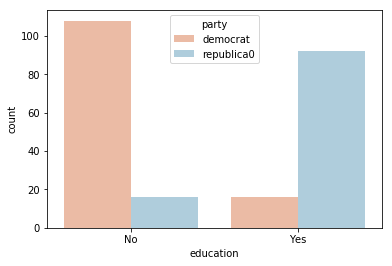

In [6]:
plt.figure()
sns.countplot(x='education', hue='party', data=df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

##### Both 'satellite' and 'missile'.

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">k-Nearest Neighbors: Fit</h1><p>Having explored the Congressional voting records dataset, it is time now to build your first classifier. In this exercise, you will fit a k-Nearest Neighbors classifier to the voting dataset, which has once again been pre-loaded for you into a DataFrame <code>df</code>. </p>
<p>In the video, Hugo discussed the importance of ensuring your data adheres to the format required by the scikit-learn API. The features need to be in an array where each column is a feature and each row a different observation or data point - in this case, a Congressman's voting record. The target needs to be a single column with the same number of observations as the feature data. We have done this for you in this exercise. Notice we named the feature array <code>X</code> and response variable <code>y</code>: This is in accordance with the common scikit-learn practice.</p>
<p>Your job is to create an instance of a k-NN classifier with 6 neighbors (by specifying the <code>n_neighbors</code> parameter) and then fit it to the data. The data has been pre-loaded into a DataFrame called <code>df</code>.</p></div></div></div>

In [7]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

In [8]:
# Create arrays for the features and the response variable
y = df['party'].values
X = df.drop('party', axis=1).values

In [9]:
# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

In [10]:
# Fit the classifier to the data
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">k-Nearest Neighbors: Predict</h1><p>Having fit a k-NN classifier, you can now use it to predict the label of a new data point. However, there is no unlabeled data available since all of it was used to fit the model! You can still use the <code>.predict()</code> method on the <code>X</code> that was used to fit the model, but it is not a good indicator of the model's ability to generalize to new, unseen data. </p>
<p>In the next video, Hugo will discuss a solution to this problem. For now, a random unlabeled data point has been generated and is available to you as <code>X_new</code>. You will use your classifier to predict the label for this new data point, as well as on the training data <code>X</code> that the model has already seen. Using <code>.predict()</code> on <code>X_new</code> will generate 1 prediction, while using it on <code>X</code> will generate 435 predictions: 1 for each sample.</p>
<p>The DataFrame has been pre-loaded as <code>df</code>. This time, you will create the feature array <code>X</code> and target variable array <code>y</code> yourself.</p></div></div></div>

In [11]:
X_new = pd.read_csv('./data/house-votes-84 - test.csv', header=None)

In [12]:
X_new

0         1         2         3         4         5         6   \
0  0.065374  0.703688  0.921275  0.888646  0.130868  0.477109  0.106336   

         7         8         9         10        11        12        13  \
0  0.888799  0.723148  0.895249  0.857919  0.321922  0.914053  0.924441   

         14        15  
0  0.902611  0.131268

In [13]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier 

# Create arrays for the features and the response variable
y = df['party'].values
X = df.drop('party', axis=1).values

# Create a k-NN classifier with 6 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X,y)

# Predict the labels for the training data X
y_pred = knn.predict(X)

# Predict and print the label for the new data point X_new
new_prediction = knn.predict(X_new)
print("Prediction: {}".format(new_prediction))

Prediction: ['democrat']


<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">The digits recognition dataset</h1><p>Up until now, you have been performing binary classification, since the target variable had two possible outcomes. Hugo, however, got to perform
multi-class classification in the videos, where the target variable could take on three possible outcomes. Why does he get to have all the fun?!
In the following exercises, you'll be working with the <a href="http://yann.lecun.com/exdb/mnist/" target="_blank">MNIST</a> digits recognition dataset, which has
10 classes, the digits 0 through 9! A reduced version of the MNIST dataset is one of scikit-learn's included datasets, and that is the one we will use in this exercise. </p>
<p>Each sample in this scikit-learn dataset is an 8x8 image representing a handwritten digit. Each pixel is represented by an integer in the range 0 to 16, indicating varying levels of black. Recall that scikit-learn's built-in datasets are of type <code>Bunch</code>, which are dictionary-like objects. Helpfully for the MNIST dataset, scikit-learn provides an <code>'images'</code> key in addition to the <code>'data'</code> and <code>'target'</code> keys that you have seen with the Iris data. Because it is a 2D array of the images corresponding to each sample, this <code>'images'</code> key is useful for visualizing the images, as you'll see in this exercise (for more on plotting 2D arrays, see <a href="https://www.datacamp.com/courses/introduction-to-data-visualization-with-python" target="_blank">Chapter 2</a> of DataCamp's course on Data Visualization with Python). On the other hand, the <code>'data'</code> key contains the feature array - that is, the images as a flattened array of 64 pixels.</p>
<p>Notice that you can access the keys of these <code>Bunch</code> objects in two different ways: By using the <code>.</code> notation, as in <code>digits.images</code>, or the <code>[]</code> notation, as in <code>digits['images']</code>. </p>
<p>For more on the MNIST data, check out <a href="https://campus.datacamp.com/courses/importing-data-in-python-part-1/introduction-and-flat-files-1?ex=10" target="_blank">this exercise</a> in Part 1 of DataCamp's Importing Data in Python course. There, the full version of the MNIST dataset is used, in which the images are 28x28. It is a famous dataset in machine learning and computer vision, and frequently used as a benchmark to evaluate the performance of a new model.</p></div></div></div>

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

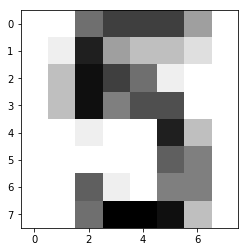

In [14]:
# Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the digits dataset: digits
digits = datasets.load_digits()

# Print the keys and DESCR of the dataset
print(digits.keys())
print(digits.DESCR)

# Print the shape of the images and data keys
print(digits.images.shape)
print(digits.data.shape)

# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Train/Test Split + Fit/Predict/Accuracy</h1><p>Now that you have learned about the importance of splitting your data into training and test sets, it's time to practice doing this on the digits dataset! After creating arrays for the features and target variable, you will split them into training and test sets, fit a k-NN classifier to the training data, and then compute its accuracy using the <code>.score()</code> method.</p></div></div></div>

In [15]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Create feature and target arrays
X = digits.data
y = digits.target

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.9833333333333333


<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Overfitting and underfitting</h1><p>Remember the model complexity curve that Hugo showed in the video? You will now construct such a curve for the digits dataset! In this exercise, you will compute and plot the training and testing accuracy scores for a variety of different neighbor values. By observing how the accuracy scores differ for the training and testing sets with different values of k, you will develop your intuition for overfitting and underfitting.</p>
<p>The training and testing sets are available to you in the workspace as <code>X_train</code>, <code>X_test</code>, <code>y_train</code>, <code>y_test</code>. In addition, <code>KNeighborsClassifier</code> has been imported from <code>sklearn.neighbors</code>.</p></div></div></div>

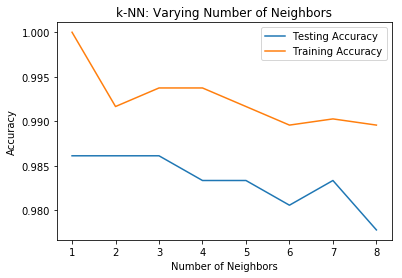

In [17]:
import numpy as np
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

## <font color=red>02 - Regression </font> 

 In the previous chapter, you made use of image and political datasets to predict binary as well as multiclass outcomes. But what if your problem requires a continuous outcome? Regression, which is the focus of this chapter, is best suited to solving such problems. You will learn about fundamental concepts in regression and apply them to predict the life expectancy in a given country using Gapminder data. 

### Which of the following is a regression problem?

Andy introduced regression to you using the Boston housing dataset. But regression models can be used in a variety of contexts to solve a variety of different problems.

Given below are four example applications of machine learning. Your job is to pick the one that is best framed as a regression problem.

##### A bike share company using time and weather data to predict the number of bikes being rented at any given hour.

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Importing data for supervised learning</h1><p>In this chapter, you will work with <a href="https://www.gapminder.org/data/" target="_blank">Gapminder</a> data that we have consolidated into one CSV file available in the workspace as <code>'gapminder.csv'</code>. Specifically, your goal will be to use this data to predict the life expectancy in a given country based on features such as the country's GDP, fertility rate, and population. As in Chapter 1, the dataset has been preprocessed.</p>
<p>Since the target variable here is quantitative, this is a regression problem. To begin, you will fit a linear regression with just one feature: <code>'fertility'</code>, which is the average number of children a woman in a given country gives birth to. In later exercises, you will use all the features to build regression models.</p>
<p>Before that, however, you need to import the data and get it into the form needed by scikit-learn. This involves creating feature and target variable arrays. Furthermore, since you are going to use only one feature to begin with, you need to do some reshaping using NumPy's <code>.reshape()</code> method. Don't worry too much about this reshaping right now, but it is something you will have to do occasionally when working with scikit-learn so it is useful to practice.</p></div></div></div>

In [18]:
# Import numpy and pandas
import numpy as np
import pandas as pd

# Read the CSV file into a DataFrame: df
df = pd.read_csv('./data/gapminder.csv')

# Create arrays for features and target variable
y = df['life'].values
X = df['fertility'].values

# Print the dimensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X.shape))

# Reshape X and y
X = X.reshape(-1,1)
y = y.reshape(-1,1)

# Print the dimensions of X and y after reshaping
print("Dimensions of y after reshaping: {}".format(y.shape))
print("Dimensions of X after reshaping: {}".format(X.shape))

Dimensions of y before reshaping: (139,)
Dimensions of X before reshaping: (139,)
Dimensions of y after reshaping: (139, 1)
Dimensions of X after reshaping: (139, 1)


<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Exploring the Gapminder data</h1><p>As always, it is important to explore your data before building models. On the right, we have constructed a heatmap showing the correlation between the different features of the Gapminder dataset, which has been pre-loaded into a DataFrame as <code>df</code> and is available for exploration in the IPython Shell. Cells that are in green show positive correlation, while cells that are in red show negative correlation. Take a moment to explore this: Which features are positively correlated with <code>life</code>, and which ones are negatively correlated? Does this match your intuition? </p>
<p>Then, in the IPython Shell, explore the DataFrame using pandas methods such as <code>.info()</code>, <code>.describe()</code>, <code>.head()</code>. </p>
<p>In case you are curious, the heatmap was generated using <a href="http://seaborn.pydata.org/generated/seaborn.heatmap.html" target="_blank">Seaborn's heatmap function</a> and the following line of code, where <code>df.corr()</code> computes the pairwise correlation between columns:</p>
<p><code>sns.heatmap(df.corr(), square=True, cmap='RdYlGn')</code></p>
<p>Once you have a feel for the data, consider the statements below and select the one that is <strong>not</strong> true. After this, Hugo will explain the mechanics of linear regression in the next video and you will be on your way building regression models!</p></div></div></div>

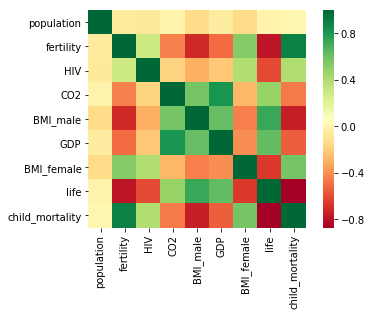

In [19]:
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
population         139 non-null float64
fertility          139 non-null float64
HIV                139 non-null float64
CO2                139 non-null float64
BMI_male           139 non-null float64
GDP                139 non-null float64
BMI_female         139 non-null float64
life               139 non-null float64
child_mortality    139 non-null float64
Region             139 non-null object
dtypes: float64(9), object(1)
memory usage: 10.9+ KB


In [21]:
df.describe()

population   fertility         HIV         CO2    BMI_male  \
count  1.390000e+02  139.000000  139.000000  139.000000  139.000000   
mean   3.549977e+07    3.005108    1.915612    4.459874   24.623054   
std    1.095121e+08    1.615354    4.408974    6.268349    2.209368   
min    2.773150e+05    1.280000    0.060000    0.008618   20.397420   
25%    3.752776e+06    1.810000    0.100000    0.496190   22.448135   
50%    9.705130e+06    2.410000    0.400000    2.223796   25.156990   
75%    2.791973e+07    4.095000    1.300000    6.589156   26.497575   
max    1.197070e+09    7.590000   25.900000   48.702062   28.456980   

                 GDP  BMI_female        life  child_mortality  
count     139.000000  139.000000  139.000000       139.000000  
mean    16638.784173  126.701914   69.602878        45.097122  
std     19207.299083    4.471997    9.122189        45.724667  
min       588.000000  117.375500   45.200000         2.700000  
25%      2899.000000  123.232200   62.200000         8.100000  
50%      9938.000000  126.519600   72.000000        24.000000  
75%     23278.500000  130.275900   76.850000        74.200000  
max    126076.000000  135.492000   82.600000       192.000000

In [22]:
df.head()

population  fertility  HIV        CO2  BMI_male      GDP  BMI_female  life  \
0  34811059.0       2.73  0.1   3.328945  24.59620  12314.0    129.9049  75.3   
1  19842251.0       6.43  2.0   1.474353  22.25083   7103.0    130.1247  58.3   
2  40381860.0       2.24  0.5   4.785170  27.50170  14646.0    118.8915  75.5   
3   2975029.0       1.40  0.1   1.804106  25.35542   7383.0    132.8108  72.5   
4  21370348.0       1.96  0.1  18.016313  27.56373  41312.0    117.3755  81.5   

   child_mortality                      Region  
0             29.5  Middle East & North Africa  
1            192.0          Sub-Saharan Africa  
2             15.4                     America  
3             20.0       Europe & Central Asia  
4              5.2         East Asia & Pacific

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Fit &amp; predict for regression</h1><p>Now, you will fit a linear regression and predict life expectancy using just one feature. You saw Andy do this earlier using the <code>'RM'</code> feature of the Boston housing dataset. In this exercise, you will use the <code>'fertility'</code> feature of the Gapminder dataset. Since the goal is to predict life expectancy, the target variable here is <code>'life'</code>. The array for the target variable has been pre-loaded as <code>y</code> and the array for <code>'fertility'</code> has been pre-loaded as <code>X_fertility</code>.</p>
<p>A scatter plot with <code>'fertility'</code> on the x-axis and <code>'life'</code> on the y-axis has been generated. As you can see, there is a strongly negative correlation, so a linear regression should be able to capture this trend. Your job is to fit a linear regression and then predict the life expectancy, overlaying these predicted values on the plot to generate a regression line. You will also compute and print the <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-1-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><msup><mi>R</mi><mn>2</mn></msup></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-1" style="width: 1.392em; display: inline-block;"><span style="display: inline-block; position: relative; width: 1.175em; height: 0px; font-size: 117%;"><span style="position: absolute; clip: rect(1.25em, 1001.18em, 2.425em, -1000em); top: -2.244em; left: 0em;"><span class="mrow" id="MathJax-Span-2"><span class="msubsup" id="MathJax-Span-3"><span style="display: inline-block; position: relative; width: 1.188em; height: 0px;"><span style="position: absolute; clip: rect(3.163em, 1000.76em, 4.188em, -1000em); top: -4.006em; left: 0em;"><span class="mi" id="MathJax-Span-4" style="font-family: MathJax_Math; font-style: italic;">R</span><span style="display: inline-block; width: 0px; height: 4.006em;"></span></span><span style="position: absolute; top: -4.369em; left: 0.759em;"><span class="mn" id="MathJax-Span-5" style="font-size: 70.7%; font-family: MathJax_Main;">2</span><span style="display: inline-block; width: 0px; height: 4.006em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.244em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.087em; border-left: 0px solid; width: 0px; height: 1.125em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><msup><mi>R</mi><mn>2</mn></msup></math></span></span><script type="math/tex" id="MathJax-Element-1">R^2</script> score using sckit-learn's <code>.score()</code> method.</p></div></div></div>

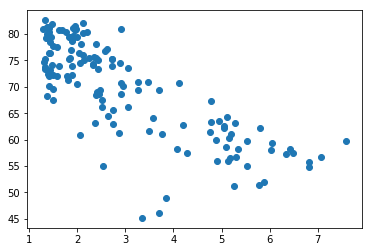

In [24]:
X_fertility = X
plt.scatter(X_fertility,y)

0.6192442167740035


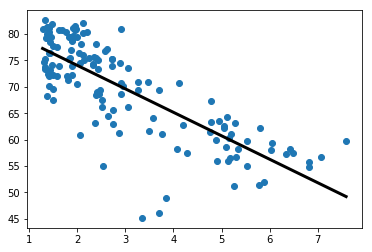

In [26]:
# Import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Create the regressor: reg
reg = LinearRegression()

# Create the prediction space
prediction_space = np.linspace(min(X_fertility), max(X_fertility)).reshape(-1,1)

# Fit the model to the data
reg.fit(X_fertility, y)

# Compute predictions over the prediction space: y_pred
y_pred = reg.predict(prediction_space)

# Print R^2 
print(reg.score(X_fertility, y))

# Plot regression line
plt.scatter(X_fertility,y)
plt.plot(prediction_space, y_pred, color='black', linewidth=3)
plt.show()

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Train/test split for regression</h1><p>As you learned in Chapter 1, train and test sets are vital to ensure that your supervised learning model is able to generalize well to new data. This was true for classification models, and is equally true for linear regression models. </p>
<p>In this exercise, you will split the Gapminder dataset into training and testing sets, and then fit and predict a linear regression over <strong>all</strong> features. In addition to computing the <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-3-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><msup><mi>R</mi><mn>2</mn></msup></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-11" style="width: 1.392em; display: inline-block;"><span style="display: inline-block; position: relative; width: 1.175em; height: 0px; font-size: 117%;"><span style="position: absolute; clip: rect(1.25em, 1001.18em, 2.425em, -1000em); top: -2.244em; left: 0em;"><span class="mrow" id="MathJax-Span-12"><span class="msubsup" id="MathJax-Span-13"><span style="display: inline-block; position: relative; width: 1.188em; height: 0px;"><span style="position: absolute; clip: rect(3.163em, 1000.76em, 4.188em, -1000em); top: -4.006em; left: 0em;"><span class="mi" id="MathJax-Span-14" style="font-family: MathJax_Math; font-style: italic;">R</span><span style="display: inline-block; width: 0px; height: 4.006em;"></span></span><span style="position: absolute; top: -4.369em; left: 0.759em;"><span class="mn" id="MathJax-Span-15" style="font-size: 70.7%; font-family: MathJax_Main;">2</span><span style="display: inline-block; width: 0px; height: 4.006em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.244em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.087em; border-left: 0px solid; width: 0px; height: 1.125em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><msup><mi>R</mi><mn>2</mn></msup></math></span></span><script type="math/tex" id="MathJax-Element-3">R^2</script> score, you will also compute the Root Mean Squared Error (RMSE), which is another commonly used metric to evaluate regression models. The feature array <code>X</code> and target variable array <code>y</code> have been pre-loaded for you from the DataFrame <code>df</code>.</p></div></div></div>

In [27]:
# Create arrays for the features and the response variable
y = df['life'].values
X = df.drop(['life', 'Region'], axis=1).values

In [28]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.8380468731430059
Root Mean Squared Error: 3.247601080037022


<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">5-fold cross-validation</h1><p>Cross-validation is a vital step in evaluating a model. It maximizes the amount of data that is used to train the model, as during the course of training, the model is not only trained, but also tested on all of the available data.</p>
<p>In this exercise, you will practice 5-fold cross validation on the Gapminder data. By default, scikit-learn's <code>cross_val_score()</code> function uses <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-5-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><msup><mi>R</mi><mn>2</mn></msup></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-21" style="width: 1.392em; display: inline-block;"><span style="display: inline-block; position: relative; width: 1.175em; height: 0px; font-size: 117%;"><span style="position: absolute; clip: rect(1.25em, 1001.18em, 2.425em, -1000em); top: -2.244em; left: 0em;"><span class="mrow" id="MathJax-Span-22"><span class="msubsup" id="MathJax-Span-23"><span style="display: inline-block; position: relative; width: 1.188em; height: 0px;"><span style="position: absolute; clip: rect(3.163em, 1000.76em, 4.188em, -1000em); top: -4.006em; left: 0em;"><span class="mi" id="MathJax-Span-24" style="font-family: MathJax_Math; font-style: italic;">R</span><span style="display: inline-block; width: 0px; height: 4.006em;"></span></span><span style="position: absolute; top: -4.369em; left: 0.759em;"><span class="mn" id="MathJax-Span-25" style="font-size: 70.7%; font-family: MathJax_Main;">2</span><span style="display: inline-block; width: 0px; height: 4.006em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.244em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.087em; border-left: 0px solid; width: 0px; height: 1.125em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><msup><mi>R</mi><mn>2</mn></msup></math></span></span><script type="math/tex" id="MathJax-Element-5">R^2</script> as the metric of choice for regression. Since you are performing 5-fold cross-validation, the function will return 5 scores. Your job is to compute these 5 scores and then take their average.</p>
<p>The DataFrame has been loaded as <code>df</code> and split into the feature/target variable arrays <code>X</code> and <code>y</code>. The modules <code>pandas</code> and <code>numpy</code> have been imported as <code>pd</code> and <code>np</code>, respectively.</p></div></div></div>

In [29]:
# Import the necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X, y, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.81720569 0.82917058 0.90214134 0.80633989 0.94495637]
Average 5-Fold CV Score: 0.8599627722793267


<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">K-Fold CV comparison</h1><p>Cross validation is essential but do not forget that the more folds you use, the more computationally expensive cross-validation becomes. In this exercise, you will explore this for yourself. Your job is to perform 3-fold cross-validation and then 10-fold cross-validation on the Gapminder dataset.</p>
<p>In the IPython Shell, you can use <code>%timeit</code> to see how long each 3-fold CV takes compared to 10-fold CV by executing the following <code>cv=3</code> and <code>cv=10</code>:</p>
<pre><code>%timeit cross_val_score(reg, X, y, cv = ____)
</code></pre>
<p><code>pandas</code> and <code>numpy</code> are available in the workspace as <code>pd</code> and <code>np</code>. The DataFrame has been loaded as <code>df</code> and the feature/target variable arrays <code>X</code> and <code>y</code> have been created.</p></div></div></div>

In [30]:
# Import necessary modules
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Create a linear regression object: reg
reg = LinearRegression()

# Perform 3-fold CV
cvscores_3 = cross_val_score(reg, X, y, cv=3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 = cross_val_score(reg, X, y, cv=10)
print(np.mean(cvscores_10))

0.8718712782621969
0.8436128620131095


In [31]:
%timeit cross_val_score(reg, X, y, cv=3)

6.42 ms ± 894 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [32]:
%timeit cross_val_score(reg, X, y, cv=10)

14.3 ms ± 2.27 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Regularization I: Lasso</h1><p>In the video, you saw how Lasso selected out the <code>'RM'</code> feature as being the most important for predicting Boston house prices, while shrinking the coefficients of certain other features to 0. Its ability to perform feature selection in this way becomes even more useful when you are dealing with data involving thousands of features. </p>
<p>In this exercise, you will fit a lasso regression to the Gapminder data you have been working with and plot the coefficients. Just as with the Boston data, you will find that the coefficients of some features are shrunk to 0, with only the most important ones remaining.</p>
<p>The feature and target variable arrays have been pre-loaded as <code>X</code> and <code>y</code>.</p></div></div></div>

In [33]:
df_columns = df.drop(['life', 'Region'], axis=1).columns

[-0.         -0.         -0.          0.          0.          0.
 -0.         -0.07087587]


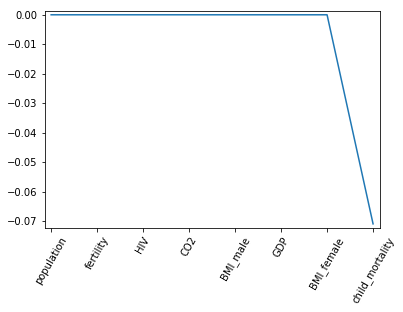

In [34]:
# Import Lasso
from sklearn.linear_model import Lasso

# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.4, normalize=True)

# Fit the regressor to the data
lasso = lasso.fit(X,y)

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

# Plot the coefficients
plt.plot(range(len(df_columns)), lasso_coef)
plt.xticks(range(len(df_columns)), df_columns.values, rotation=60)
plt.margins(0.02)
plt.show()

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Regularization II: Ridge</h1><p>Lasso is great for feature selection, but when building regression models, Ridge regression should be your first choice.</p>
<p>Recall that lasso performs regularization by adding to the loss function a penalty term of the <em>absolute</em> value of each coefficient multiplied by some alpha. This is also known as <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-6-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>L</mi><mn>1</mn></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-26" style="width: 1.392em; display: inline-block;"><span style="display: inline-block; position: relative; width: 1.175em; height: 0px; font-size: 117%;"><span style="position: absolute; clip: rect(1.507em, 1001.1em, 2.511em, -1000em); top: -2.35em; left: 0em;"><span class="mrow" id="MathJax-Span-27"><span class="mi" id="MathJax-Span-28" style="font-family: MathJax_Math; font-style: italic;">L</span><span class="mn" id="MathJax-Span-29" style="font-family: MathJax_Main;">1</span></span><span style="display: inline-block; width: 0px; height: 2.35em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.063em; border-left: 0px solid; width: 0px; height: 0.924em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>L</mi><mn>1</mn></math></span></span><script type="math/tex" id="MathJax-Element-6">L1</script> regularization because the regularization term is the <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-7-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>L</mi><mn>1</mn></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-30" style="width: 1.392em; display: inline-block;"><span style="display: inline-block; position: relative; width: 1.175em; height: 0px; font-size: 117%;"><span style="position: absolute; clip: rect(1.507em, 1001.1em, 2.511em, -1000em); top: -2.35em; left: 0em;"><span class="mrow" id="MathJax-Span-31"><span class="mi" id="MathJax-Span-32" style="font-family: MathJax_Math; font-style: italic;">L</span><span class="mn" id="MathJax-Span-33" style="font-family: MathJax_Main;">1</span></span><span style="display: inline-block; width: 0px; height: 2.35em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.063em; border-left: 0px solid; width: 0px; height: 0.924em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>L</mi><mn>1</mn></math></span></span><script type="math/tex" id="MathJax-Element-7">L1</script> norm of the coefficients. This is not the only way to regularize, however. </p>
<p>If instead you took the sum of the <em>squared</em> values of the coefficients multiplied by some alpha - like in Ridge regression - you would be computing the <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-8-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>L</mi><mn>2</mn></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-34" style="width: 1.392em; display: inline-block;"><span style="display: inline-block; position: relative; width: 1.175em; height: 0px; font-size: 117%;"><span style="position: absolute; clip: rect(1.507em, 1001.12em, 2.511em, -1000em); top: -2.35em; left: 0em;"><span class="mrow" id="MathJax-Span-35"><span class="mi" id="MathJax-Span-36" style="font-family: MathJax_Math; font-style: italic;">L</span><span class="mn" id="MathJax-Span-37" style="font-family: MathJax_Main;">2</span></span><span style="display: inline-block; width: 0px; height: 2.35em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.063em; border-left: 0px solid; width: 0px; height: 0.924em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>L</mi><mn>2</mn></math></span></span><script type="math/tex" id="MathJax-Element-8">L2</script> norm. In this exercise, you will practice fitting ridge regression models over a range of different alphas, and plot cross-validated <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-9-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><msup><mi>R</mi><mn>2</mn></msup></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-38" style="width: 1.392em; display: inline-block;"><span style="display: inline-block; position: relative; width: 1.175em; height: 0px; font-size: 117%;"><span style="position: absolute; clip: rect(1.25em, 1001.18em, 2.425em, -1000em); top: -2.244em; left: 0em;"><span class="mrow" id="MathJax-Span-39"><span class="msubsup" id="MathJax-Span-40"><span style="display: inline-block; position: relative; width: 1.188em; height: 0px;"><span style="position: absolute; clip: rect(3.163em, 1000.76em, 4.188em, -1000em); top: -4.006em; left: 0em;"><span class="mi" id="MathJax-Span-41" style="font-family: MathJax_Math; font-style: italic;">R</span><span style="display: inline-block; width: 0px; height: 4.006em;"></span></span><span style="position: absolute; top: -4.369em; left: 0.759em;"><span class="mn" id="MathJax-Span-42" style="font-size: 70.7%; font-family: MathJax_Main;">2</span><span style="display: inline-block; width: 0px; height: 4.006em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.244em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.087em; border-left: 0px solid; width: 0px; height: 1.125em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><msup><mi>R</mi><mn>2</mn></msup></math></span></span><script type="math/tex" id="MathJax-Element-9">R^2</script> scores for each, using this function that we have defined for you, which plots the <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-10-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><msup><mi>R</mi><mn>2</mn></msup></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-43" style="width: 1.392em; display: inline-block;"><span style="display: inline-block; position: relative; width: 1.175em; height: 0px; font-size: 117%;"><span style="position: absolute; clip: rect(1.25em, 1001.18em, 2.425em, -1000em); top: -2.244em; left: 0em;"><span class="mrow" id="MathJax-Span-44"><span class="msubsup" id="MathJax-Span-45"><span style="display: inline-block; position: relative; width: 1.188em; height: 0px;"><span style="position: absolute; clip: rect(3.163em, 1000.76em, 4.188em, -1000em); top: -4.006em; left: 0em;"><span class="mi" id="MathJax-Span-46" style="font-family: MathJax_Math; font-style: italic;">R</span><span style="display: inline-block; width: 0px; height: 4.006em;"></span></span><span style="position: absolute; top: -4.369em; left: 0.759em;"><span class="mn" id="MathJax-Span-47" style="font-size: 70.7%; font-family: MathJax_Main;">2</span><span style="display: inline-block; width: 0px; height: 4.006em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.244em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.087em; border-left: 0px solid; width: 0px; height: 1.125em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><msup><mi>R</mi><mn>2</mn></msup></math></span></span><script type="math/tex" id="MathJax-Element-10">R^2</script> score as well as standard error for each alpha:</p>
<pre><code>def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()
</code></pre>
<p>Don't worry about the specifics of the above function works. The motivation behind this exercise is for you to see how the <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-11-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><msup><mi>R</mi><mn>2</mn></msup></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-48" style="width: 1.392em; display: inline-block;"><span style="display: inline-block; position: relative; width: 1.175em; height: 0px; font-size: 117%;"><span style="position: absolute; clip: rect(1.25em, 1001.18em, 2.425em, -1000em); top: -2.244em; left: 0em;"><span class="mrow" id="MathJax-Span-49"><span class="msubsup" id="MathJax-Span-50"><span style="display: inline-block; position: relative; width: 1.188em; height: 0px;"><span style="position: absolute; clip: rect(3.163em, 1000.76em, 4.188em, -1000em); top: -4.006em; left: 0em;"><span class="mi" id="MathJax-Span-51" style="font-family: MathJax_Math; font-style: italic;">R</span><span style="display: inline-block; width: 0px; height: 4.006em;"></span></span><span style="position: absolute; top: -4.369em; left: 0.759em;"><span class="mn" id="MathJax-Span-52" style="font-size: 70.7%; font-family: MathJax_Main;">2</span><span style="display: inline-block; width: 0px; height: 4.006em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.244em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.087em; border-left: 0px solid; width: 0px; height: 1.125em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><msup><mi>R</mi><mn>2</mn></msup></math></span></span><script type="math/tex" id="MathJax-Element-11">R^2</script> score varies with different alphas, and to understand the importance of selecting the right value for alpha. You'll learn how to tune alpha in the next chapter.</p></div></div></div>

In [35]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

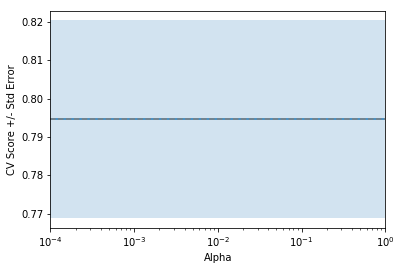

In [39]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = ridge.alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)
#plt.plot(ridge_scores, ridge_scores_std,)

## <font color=red>03 - Fine-tuning your model</font> 

 Having trained your model, your next task is to evaluate its performance. What metrics can you use to gauge how good your model is? So far, you have used accuracy for classification and R-squared for regression. In this chapter, you will learn about some of the other metrics available in scikit-learn that will allow you to assess your model's performance in a more nuanced manner. You will then learn to optimize both your classification as well as regression models using hyperparameter tuning. 

In [40]:
diabetes = pd.read_csv('./data/diabetes.csv')

In [41]:
diabetes.head()

pregnancies  glucose  diastolic  triceps  insulin   bmi    dpf  age  \
0            6      148         72       35        0  33.6  0.627   50   
1            1       85         66       29        0  26.6  0.351   31   
2            8      183         64        0        0  23.3  0.672   32   
3            1       89         66       23       94  28.1  0.167   21   
4            0      137         40       35      168  43.1  2.288   33   

   diabetes  
0         1  
1         0  
2         1  
3         0  
4         1

In [42]:
X=diabetes.drop('diabetes', axis=1)
y=diabetes['diabetes']

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Metrics for classification</h1><p>In Chapter 1, you evaluated the performance of your k-NN classifier based on its accuracy. However, as Andy discussed, accuracy is not always an informative metric. In this exercise, you will dive more deeply into evaluating the performance of binary classifiers by computing a confusion matrix and generating a classification report. </p>
<p>You may have noticed in the video that the classification report consisted of three rows, and an additional <em>support</em> column. The <em>support</em> gives the number of samples of the true response that lie in that class - so in the video example, the support was the number of Republicans or Democrats in the test set on which the classification report was computed. The <em>precision</em>, <em>recall</em>, and <em>f1-score</em> columns, then, gave the respective metrics for that particular class.</p>
<p>Here, you'll work with the <a href="https://www.kaggle.com/uciml/pima-indians-diabetes-database" target="_blank">PIMA Indians</a> dataset obtained from the UCI Machine Learning Repository. The goal is to predict whether or not a given female patient will contract diabetes based on features such as BMI, age, and number of pregnancies. Therefore, it is a binary classification problem. A target value of <code>0</code> indicates that the patient does <em>not</em> have diabetes, while a value of <code>1</code> indicates that the patient <em>does</em> have diabetes. As in Chapters 1 and 2, the dataset has been preprocessed to deal with missing values.</p>
<p>The dataset has been loaded into a DataFrame <code>df</code> and the feature and target variable arrays <code>X</code> and <code>y</code> have been created for you. In addition, <code>sklearn.model_selection.train_test_split</code> and <code>sklearn.neighbors.KNeighborsClassifier</code> have already been imported.</p>
<p>Your job is to train a k-NN classifier to the data and evaluate its performance by generating a confusion matrix and classification report.</p></div></div></div>

In [43]:
# Import necessary modules
from sklearn.metrics import classification_report, confusion_matrix

# Create training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Instantiate a k-NN classifier: knn
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[176  30]
 [ 56  46]]
             precision    recall  f1-score   support

          0       0.76      0.85      0.80       206
          1       0.61      0.45      0.52       102

avg / total       0.71      0.72      0.71       308



<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Building a logistic regression model</h1><p>Time to build your first logistic regression model! As Hugo showed in the video, scikit-learn makes it very easy to try different models, since the Train-Test-Split/Instantiate/Fit/Predict paradigm applies to all classifiers and regressors - which are known in scikit-learn as 'estimators'. You'll see this now for yourself as you train a logistic regression model on exactly the same data as in the previous exercise. Will it outperform k-NN? There's only one way to find out! </p>
<p>The feature and target variable arrays <code>X</code> and <code>y</code> have been pre-loaded, and <code>train_test_split</code> has been imported for you from <code>sklearn.model_selection</code>.</p></div></div></div>

In [44]:
# Import the necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

# Create the classifier: logreg
logreg = LogisticRegression()

# Fit the classifier to the training data
logreg.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = logreg.predict(X_test)

# Compute and print the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[174  32]
 [ 36  66]]
             precision    recall  f1-score   support

          0       0.83      0.84      0.84       206
          1       0.67      0.65      0.66       102

avg / total       0.78      0.78      0.78       308



<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Plotting an ROC curve</h1><p>Great job in the previous exercise - you now have a new addition to your toolbox of classifiers! </p>
<p>Classification reports and confusion matrices are great methods to quantitatively evaluate model performance, while ROC curves provide a way to visually evaluate models. As Hugo demonstrated in the video, most classifiers in scikit-learn have a <code>.predict_proba()</code> method which returns the probability of a given sample being in a particular class. Having built a logistic regression model, you'll now evaluate its performance by plotting an ROC curve. In doing so, you'll make use of the <code>.predict_proba()</code> method and become familiar with its functionality. </p>
<p>Here, you'll continue working with the PIMA Indians diabetes dataset. The classifier has already been fit to the training data and is available as <code>logreg</code>.</p></div>

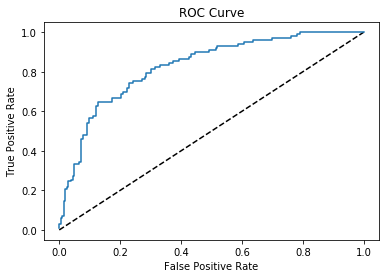

In [45]:
# Import necessary modules
from sklearn.metrics import roc_curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Precision-recall Curve</h1><p>When looking at your ROC curve, you may have noticed that the y-axis (True positive rate) is also known as recall. Indeed, in addition to the ROC curve, there are other ways to visually evaluate model performance. One such way is the precision-recall curve, which is generated by plotting the precision and recall for different thresholds. As a reminder, precision and recall are defined as:</p>
<p><span class="MathJax_Preview" style="color: inherit; display: none;"></span><div class="MathJax_Display" style="text-align: center;"><span class="MathJax" id="MathJax-Element-12-Frame" tabindex="0" style="text-align: center; position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot; display=&quot;block&quot;><mi>P</mi><mi>r</mi><mi>e</mi><mi>c</mi><mi>i</mi><mi>s</mi><mi>i</mi><mi>o</mi><mi>n</mi><mo>=</mo><mfrac><mrow><mi>T</mi><mi>P</mi></mrow><mrow><mi>T</mi><mi>P</mi><mo>+</mo><mi>F</mi><mi>P</mi></mrow></mfrac></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-53" style="width: 11.968em; display: inline-block;"><span style="display: inline-block; position: relative; width: 10.203em; height: 0px; font-size: 117%;"><span style="position: absolute; clip: rect(0.831em, 1010.2em, 3.279em, -1000em); top: -2.35em; left: 0em;"><span class="mrow" id="MathJax-Span-54"><span class="mi" id="MathJax-Span-55" style="font-family: MathJax_Math; font-style: italic;">P<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.109em;"></span></span><span class="mi" id="MathJax-Span-56" style="font-family: MathJax_Math; font-style: italic;">r</span><span class="mi" id="MathJax-Span-57" style="font-family: MathJax_Math; font-style: italic;">e</span><span class="mi" id="MathJax-Span-58" style="font-family: MathJax_Math; font-style: italic;">c</span><span class="mi" id="MathJax-Span-59" style="font-family: MathJax_Math; font-style: italic;">i</span><span class="mi" id="MathJax-Span-60" style="font-family: MathJax_Math; font-style: italic;">s</span><span class="mi" id="MathJax-Span-61" style="font-family: MathJax_Math; font-style: italic;">i</span><span class="mi" id="MathJax-Span-62" style="font-family: MathJax_Math; font-style: italic;">o</span><span class="mi" id="MathJax-Span-63" style="font-family: MathJax_Math; font-style: italic;">n</span><span class="mo" id="MathJax-Span-64" style="font-family: MathJax_Main; padding-left: 0.278em;">=</span><span class="mfrac" id="MathJax-Span-65" style="padding-left: 0.278em;"><span style="display: inline-block; position: relative; width: 4.297em; height: 0px; margin-right: 0.12em; margin-left: 0.12em;"><span style="position: absolute; clip: rect(3.163em, 1001.46em, 4.167em, -1000em); top: -4.683em; left: 50%; margin-left: -0.728em;"><span class="mrow" id="MathJax-Span-66"><span class="mi" id="MathJax-Span-67" style="font-family: MathJax_Math; font-style: italic;">T<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.12em;"></span></span><span class="mi" id="MathJax-Span-68" style="font-family: MathJax_Math; font-style: italic;">P<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.109em;"></span></span></span><span style="display: inline-block; width: 0px; height: 4.006em;"></span></span><span style="position: absolute; clip: rect(3.163em, 1004.18em, 4.249em, -1000em); top: -3.32em; left: 50%; margin-left: -2.089em;"><span class="mrow" id="MathJax-Span-69"><span class="mi" id="MathJax-Span-70" style="font-family: MathJax_Math; font-style: italic;">T<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.12em;"></span></span><span class="mi" id="MathJax-Span-71" style="font-family: MathJax_Math; font-style: italic;">P<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.109em;"></span></span><span class="mo" id="MathJax-Span-72" style="font-family: MathJax_Main; padding-left: 0.222em;">+</span><span class="mi" id="MathJax-Span-73" style="font-family: MathJax_Math; font-style: italic; padding-left: 0.222em;">F<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.106em;"></span></span><span class="mi" id="MathJax-Span-74" style="font-family: MathJax_Math; font-style: italic;">P<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.109em;"></span></span></span><span style="display: inline-block; width: 0px; height: 4.006em;"></span></span><span style="position: absolute; clip: rect(0.841em, 1004.3em, 1.229em, -1000em); top: -1.288em; left: 0em;"><span style="display: inline-block; overflow: hidden; vertical-align: 0em; border-top: 1.3px solid; width: 4.297em; height: 0px;"></span><span style="display: inline-block; width: 0px; height: 1.068em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.35em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.961em; border-left: 0px solid; width: 0px; height: 2.614em;"></span></span></nobr><span class="MJX_Assistive_MathML MJX_Assistive_MathML_Block" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML" display="block"><mi>P</mi><mi>r</mi><mi>e</mi><mi>c</mi><mi>i</mi><mi>s</mi><mi>i</mi><mi>o</mi><mi>n</mi><mo>=</mo><mfrac><mrow><mi>T</mi><mi>P</mi></mrow><mrow><mi>T</mi><mi>P</mi><mo>+</mo><mi>F</mi><mi>P</mi></mrow></mfrac></math></span></span></div><script type="math/tex; mode=display" id="MathJax-Element-12"> Precision = \frac{TP}{TP+FP} </script></p>
<p><span class="MathJax_Preview" style="color: inherit; display: none;"></span><div class="MathJax_Display" style="text-align: center;"><span class="MathJax" id="MathJax-Element-13-Frame" tabindex="0" style="text-align: center; position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot; display=&quot;block&quot;><mi>R</mi><mi>e</mi><mi>c</mi><mi>a</mi><mi>l</mi><mi>l</mi><mo>=</mo><mfrac><mrow><mi>T</mi><mi>P</mi></mrow><mrow><mi>T</mi><mi>P</mi><mo>+</mo><mi>F</mi><mi>N</mi></mrow></mfrac></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-75" style="width: 10.313em; display: inline-block;"><span style="display: inline-block; position: relative; width: 8.814em; height: 0px; font-size: 117%;"><span style="position: absolute; clip: rect(0.831em, 1008.81em, 3.279em, -1000em); top: -2.35em; left: 0em;"><span class="mrow" id="MathJax-Span-76"><span class="mi" id="MathJax-Span-77" style="font-family: MathJax_Math; font-style: italic;">R</span><span class="mi" id="MathJax-Span-78" style="font-family: MathJax_Math; font-style: italic;">e</span><span class="mi" id="MathJax-Span-79" style="font-family: MathJax_Math; font-style: italic;">c</span><span class="mi" id="MathJax-Span-80" style="font-family: MathJax_Math; font-style: italic;">a</span><span class="mi" id="MathJax-Span-81" style="font-family: MathJax_Math; font-style: italic;">l</span><span class="mi" id="MathJax-Span-82" style="font-family: MathJax_Math; font-style: italic;">l</span><span class="mo" id="MathJax-Span-83" style="font-family: MathJax_Main; padding-left: 0.278em;">=</span><span class="mfrac" id="MathJax-Span-84" style="padding-left: 0.278em;"><span style="display: inline-block; position: relative; width: 4.434em; height: 0px; margin-right: 0.12em; margin-left: 0.12em;"><span style="position: absolute; clip: rect(3.163em, 1001.46em, 4.167em, -1000em); top: -4.683em; left: 50%; margin-left: -0.728em;"><span class="mrow" id="MathJax-Span-85"><span class="mi" id="MathJax-Span-86" style="font-family: MathJax_Math; font-style: italic;">T<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.12em;"></span></span><span class="mi" id="MathJax-Span-87" style="font-family: MathJax_Math; font-style: italic;">P<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.109em;"></span></span></span><span style="display: inline-block; width: 0px; height: 4.006em;"></span></span><span style="position: absolute; clip: rect(3.163em, 1004.31em, 4.249em, -1000em); top: -3.32em; left: 50%; margin-left: -2.157em;"><span class="mrow" id="MathJax-Span-88"><span class="mi" id="MathJax-Span-89" style="font-family: MathJax_Math; font-style: italic;">T<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.12em;"></span></span><span class="mi" id="MathJax-Span-90" style="font-family: MathJax_Math; font-style: italic;">P<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.109em;"></span></span><span class="mo" id="MathJax-Span-91" style="font-family: MathJax_Main; padding-left: 0.222em;">+</span><span class="mi" id="MathJax-Span-92" style="font-family: MathJax_Math; font-style: italic; padding-left: 0.222em;">F<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.106em;"></span></span><span class="mi" id="MathJax-Span-93" style="font-family: MathJax_Math; font-style: italic;">N<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.085em;"></span></span></span><span style="display: inline-block; width: 0px; height: 4.006em;"></span></span><span style="position: absolute; clip: rect(0.841em, 1004.43em, 1.229em, -1000em); top: -1.288em; left: 0em;"><span style="display: inline-block; overflow: hidden; vertical-align: 0em; border-top: 1.3px solid; width: 4.434em; height: 0px;"></span><span style="display: inline-block; width: 0px; height: 1.068em;"></span></span></span></span></span><span style="display: inline-block; width: 0px; height: 2.35em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.961em; border-left: 0px solid; width: 0px; height: 2.614em;"></span></span></nobr><span class="MJX_Assistive_MathML MJX_Assistive_MathML_Block" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML" display="block"><mi>R</mi><mi>e</mi><mi>c</mi><mi>a</mi><mi>l</mi><mi>l</mi><mo>=</mo><mfrac><mrow><mi>T</mi><mi>P</mi></mrow><mrow><mi>T</mi><mi>P</mi><mo>+</mo><mi>F</mi><mi>N</mi></mrow></mfrac></math></span></span></div><script type="math/tex; mode=display" id="MathJax-Element-13"> Recall = \frac{TP}{TP+FN} </script></p>
<p>On the right, a precision-recall curve has been generated for the diabetes dataset. The classification report and confusion matrix are displayed in the IPython Shell.</p>
<p>Study the precision-recall curve and then consider the statements given below. Choose the one statement that is <strong>not</strong> true. Note that here, the class is positive (1) if the individual <em>has</em> diabetes.</p></div>

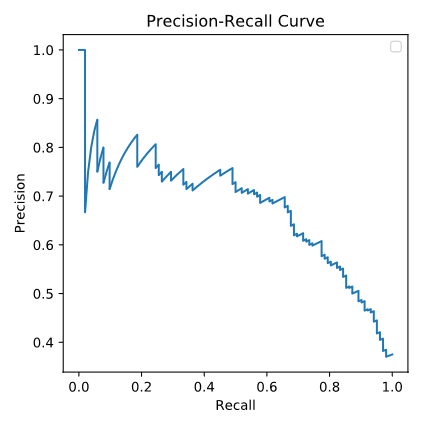

##### Precision and recall take true negatives into consideration.

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">AUC computation</h1><p>Say you have a binary classifier that in fact is just randomly making guesses. It would be correct approximately 50% of the time, and the resulting ROC curve would be a diagonal line in which the True Positive Rate and False Positive Rate are always equal. The Area under this ROC curve would be 0.5. This is one way in which the AUC, which Hugo discussed in the video, is an informative metric to evaluate a model. If the AUC is greater than 0.5, the model is better than random guessing. Always a good sign!  </p>
<p>In this exercise, you'll calculate AUC scores using the <code>roc_auc_score()</code> function from <code>sklearn.metrics</code> as well as by performing cross-validation on the diabetes dataset. </p>
<p><code>X</code> and <code>y</code>, along with training and test sets <code>X_train</code>, <code>X_test</code>, <code>y_train</code>, <code>y_test</code>, have been pre-loaded for you, and a logistic regression classifier <code>logreg</code> has been fit to the training data.</p></div>

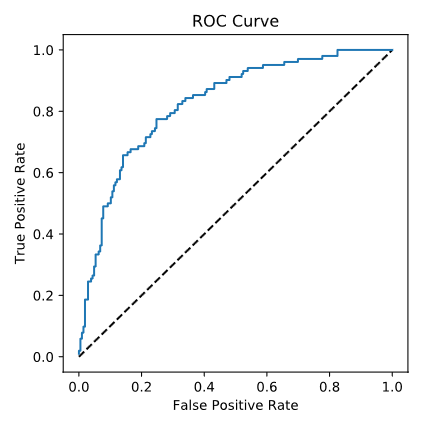

In [46]:
# Import necessary modules
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg, X, y, cv=5, scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC: 0.8268608414239483
AUC scores computed using 5-fold cross-validation: [0.7987037  0.80796296 0.81944444 0.86603774 0.85037736]


<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Hyperparameter tuning with GridSearchCV</h1><p>Hugo demonstrated how to tune the <code>n_neighbors</code> parameter of the <code>KNeighborsClassifier()</code> using GridSearchCV on the voting dataset. You will now practice this yourself, but by using logistic regression on the diabetes dataset instead! </p>
<p>Like the alpha parameter of lasso and ridge regularization that you saw earlier, logistic regression also has a regularization parameter: <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-14-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>C</mi></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-94" style="width: 0.911em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.748em; height: 0px; font-size: 117%;"><span style="position: absolute; clip: rect(1.485em, 1000.75em, 2.533em, -1000em); top: -2.35em; left: 0em;"><span class="mrow" id="MathJax-Span-95"><span class="mi" id="MathJax-Span-96" style="font-family: MathJax_Math; font-style: italic;">C<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.045em;"></span></span></span><span style="display: inline-block; width: 0px; height: 2.35em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.088em; border-left: 0px solid; width: 0px; height: 0.976em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>C</mi></math></span></span><script type="math/tex" id="MathJax-Element-14">C</script>. <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-15-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>C</mi></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-97" style="width: 0.911em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.748em; height: 0px; font-size: 117%;"><span style="position: absolute; clip: rect(1.485em, 1000.75em, 2.533em, -1000em); top: -2.35em; left: 0em;"><span class="mrow" id="MathJax-Span-98"><span class="mi" id="MathJax-Span-99" style="font-family: MathJax_Math; font-style: italic;">C<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.045em;"></span></span></span><span style="display: inline-block; width: 0px; height: 2.35em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.088em; border-left: 0px solid; width: 0px; height: 0.976em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>C</mi></math></span></span><script type="math/tex" id="MathJax-Element-15">C</script> controls the <em>inverse</em> of the regularization strength, and this is what you will tune in this exercise. A large <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-16-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>C</mi></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-100" style="width: 0.911em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.748em; height: 0px; font-size: 117%;"><span style="position: absolute; clip: rect(1.485em, 1000.75em, 2.533em, -1000em); top: -2.35em; left: 0em;"><span class="mrow" id="MathJax-Span-101"><span class="mi" id="MathJax-Span-102" style="font-family: MathJax_Math; font-style: italic;">C<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.045em;"></span></span></span><span style="display: inline-block; width: 0px; height: 2.35em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.088em; border-left: 0px solid; width: 0px; height: 0.976em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>C</mi></math></span></span><script type="math/tex" id="MathJax-Element-16">C</script> can lead to an <em>overfit</em> model, while a small <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-17-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>C</mi></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-103" style="width: 0.911em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.748em; height: 0px; font-size: 117%;"><span style="position: absolute; clip: rect(1.485em, 1000.75em, 2.533em, -1000em); top: -2.35em; left: 0em;"><span class="mrow" id="MathJax-Span-104"><span class="mi" id="MathJax-Span-105" style="font-family: MathJax_Math; font-style: italic;">C<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.045em;"></span></span></span><span style="display: inline-block; width: 0px; height: 2.35em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.088em; border-left: 0px solid; width: 0px; height: 0.976em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>C</mi></math></span></span><script type="math/tex" id="MathJax-Element-17">C</script> can lead to an <em>underfit</em> model.</p>
<p>The hyperparameter space for <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-18-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>C</mi></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-106" style="width: 0.911em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.748em; height: 0px; font-size: 117%;"><span style="position: absolute; clip: rect(1.485em, 1000.75em, 2.533em, -1000em); top: -2.35em; left: 0em;"><span class="mrow" id="MathJax-Span-107"><span class="mi" id="MathJax-Span-108" style="font-family: MathJax_Math; font-style: italic;">C<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.045em;"></span></span></span><span style="display: inline-block; width: 0px; height: 2.35em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.088em; border-left: 0px solid; width: 0px; height: 0.976em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>C</mi></math></span></span><script type="math/tex" id="MathJax-Element-18">C</script> has been setup for you. Your job is to use GridSearchCV and logistic regression to find the optimal <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-19-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>C</mi></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-109" style="width: 0.911em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.748em; height: 0px; font-size: 117%;"><span style="position: absolute; clip: rect(1.485em, 1000.75em, 2.533em, -1000em); top: -2.35em; left: 0em;"><span class="mrow" id="MathJax-Span-110"><span class="mi" id="MathJax-Span-111" style="font-family: MathJax_Math; font-style: italic;">C<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.045em;"></span></span></span><span style="display: inline-block; width: 0px; height: 2.35em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.088em; border-left: 0px solid; width: 0px; height: 0.976em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>C</mi></math></span></span><script type="math/tex" id="MathJax-Element-19">C</script> in this hyperparameter space. The feature array is available as <code>X</code> and target variable array is available as <code>y</code>.</p>
<p>You may be wondering why you aren't asked to split the data into training and test sets. Good observation! Here, we want you to focus on the process of setting up the hyperparameter grid and performing grid-search cross-validation. In practice, you will indeed want to hold out a portion of your data for evaluation purposes, and you will learn all about this in the next video!</p></div>

In [48]:
# Import necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X,y)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 268.2695795279727}
Best score is 0.7708333333333334


<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Hyperparameter tuning with RandomizedSearchCV</h1><p>GridSearchCV can be computationally expensive, especially if you are searching over a large hyperparameter space and dealing with multiple hyperparameters. A solution to this is to use <code>RandomizedSearchCV</code>, in which not all hyperparameter values are tried out. Instead, a fixed number of hyperparameter settings is sampled from specified probability distributions. You'll practice using <code>RandomizedSearchCV</code> in this exercise and see how this works.</p>
<p>Here, you'll also be introduced to a new model: the Decision Tree. Don't worry about the specifics of how this model works. Just like k-NN, linear regression, and logistic regression, decision trees in scikit-learn have <code>.fit()</code> and <code>.predict()</code> methods that you can use in exactly the same way as before. Decision trees have many parameters that can be tuned, such as <code>max_features</code>, <code>max_depth</code>, and <code>min_samples_leaf</code>: This makes it an ideal use case for <code>RandomizedSearchCV</code>. </p>
<p>As before, the feature array <code>X</code> and target variable array <code>y</code> of the diabetes dataset have been pre-loaded. The hyperparameter settings have been specified for you. Your goal is to use <code>RandomizedSearchCV</code> to find the optimal hyperparameters. Go for it!</p></div>

In [49]:
# Import necessary modules
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV 

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
tree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X,y)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': 7, 'min_samples_leaf': 6}
Best score is 0.7369791666666666


<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Hold-out set in practice I: Classification</h1><p>You will now practice evaluating a model with tuned hyperparameters on a hold-out set. The feature array and target variable array from the diabetes dataset have been pre-loaded as <code>X</code> and <code>y</code>. </p>
<p>In addition to <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-22-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>C</mi></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-118" style="width: 0.911em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.748em; height: 0px; font-size: 117%;"><span style="position: absolute; clip: rect(1.485em, 1000.75em, 2.533em, -1000em); top: -2.35em; left: 0em;"><span class="mrow" id="MathJax-Span-119"><span class="mi" id="MathJax-Span-120" style="font-family: MathJax_Math; font-style: italic;">C<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.045em;"></span></span></span><span style="display: inline-block; width: 0px; height: 2.35em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.088em; border-left: 0px solid; width: 0px; height: 0.976em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>C</mi></math></span></span><script type="math/tex" id="MathJax-Element-22">C</script>, logistic regression has a <code>'penalty'</code> hyperparameter which specifies whether to use <code>'l1'</code> or <code>'l2'</code> regularization. Your job in this exercise is to create a hold-out set, tune the <code>'C'</code> and <code>'penalty'</code> hyperparameters of a logistic regression classifier using <code>GridSearchCV</code> on the training set.</p></div>

In [50]:
# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

# Instantiate the logistic regression classifier: logreg
logreg = LogisticRegression()

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg,param_grid,cv=5)

# Fit it to the training data
logreg_cv.fit(X_train,y_train)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameter: {'C': 31.622776601683793, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy: 0.7673913043478261


<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Hold-out set in practice II: Regression</h1><p>Remember lasso and ridge regression from the previous chapter? Lasso used the <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-23-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>L</mi><mn>1</mn></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-121" style="width: 1.392em; display: inline-block;"><span style="display: inline-block; position: relative; width: 1.175em; height: 0px; font-size: 117%;"><span style="position: absolute; clip: rect(1.507em, 1001.1em, 2.511em, -1000em); top: -2.35em; left: 0em;"><span class="mrow" id="MathJax-Span-122"><span class="mi" id="MathJax-Span-123" style="font-family: MathJax_Math; font-style: italic;">L</span><span class="mn" id="MathJax-Span-124" style="font-family: MathJax_Main;">1</span></span><span style="display: inline-block; width: 0px; height: 2.35em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.063em; border-left: 0px solid; width: 0px; height: 0.924em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>L</mi><mn>1</mn></math></span></span><script type="math/tex" id="MathJax-Element-23">L1</script> penalty to regularize, while ridge used the <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-24-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>L</mi><mn>2</mn></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-125" style="width: 1.392em; display: inline-block;"><span style="display: inline-block; position: relative; width: 1.175em; height: 0px; font-size: 117%;"><span style="position: absolute; clip: rect(1.507em, 1001.12em, 2.511em, -1000em); top: -2.35em; left: 0em;"><span class="mrow" id="MathJax-Span-126"><span class="mi" id="MathJax-Span-127" style="font-family: MathJax_Math; font-style: italic;">L</span><span class="mn" id="MathJax-Span-128" style="font-family: MathJax_Main;">2</span></span><span style="display: inline-block; width: 0px; height: 2.35em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.063em; border-left: 0px solid; width: 0px; height: 0.924em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>L</mi><mn>2</mn></math></span></span><script type="math/tex" id="MathJax-Element-24">L2</script> penalty. There is another type of regularized regression known as the elastic net. In elastic net regularization, the penalty term is a linear combination of the <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-25-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>L</mi><mn>1</mn></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-129" style="width: 1.392em; display: inline-block;"><span style="display: inline-block; position: relative; width: 1.175em; height: 0px; font-size: 117%;"><span style="position: absolute; clip: rect(1.507em, 1001.1em, 2.511em, -1000em); top: -2.35em; left: 0em;"><span class="mrow" id="MathJax-Span-130"><span class="mi" id="MathJax-Span-131" style="font-family: MathJax_Math; font-style: italic;">L</span><span class="mn" id="MathJax-Span-132" style="font-family: MathJax_Main;">1</span></span><span style="display: inline-block; width: 0px; height: 2.35em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.063em; border-left: 0px solid; width: 0px; height: 0.924em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>L</mi><mn>1</mn></math></span></span><script type="math/tex" id="MathJax-Element-25">L1</script> and <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-26-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>L</mi><mn>2</mn></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-133" style="width: 1.392em; display: inline-block;"><span style="display: inline-block; position: relative; width: 1.175em; height: 0px; font-size: 117%;"><span style="position: absolute; clip: rect(1.507em, 1001.12em, 2.511em, -1000em); top: -2.35em; left: 0em;"><span class="mrow" id="MathJax-Span-134"><span class="mi" id="MathJax-Span-135" style="font-family: MathJax_Math; font-style: italic;">L</span><span class="mn" id="MathJax-Span-136" style="font-family: MathJax_Main;">2</span></span><span style="display: inline-block; width: 0px; height: 2.35em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.063em; border-left: 0px solid; width: 0px; height: 0.924em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>L</mi><mn>2</mn></math></span></span><script type="math/tex" id="MathJax-Element-26">L2</script> penalties:</p>
<p><span class="MathJax_Preview" style="color: inherit; display: none;"></span><div class="MathJax_Display" style="text-align: center;"><span class="MathJax" id="MathJax-Element-27-Frame" tabindex="0" style="text-align: center; position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot; display=&quot;block&quot;><mi>a</mi><mo>&amp;#x2217;</mo><mi>L</mi><mn>1</mn><mo>+</mo><mi>b</mi><mo>&amp;#x2217;</mo><mi>L</mi><mn>2</mn></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-137" style="width: 7.535em; display: inline-block;"><span style="display: inline-block; position: relative; width: 6.41em; height: 0px; font-size: 117%;"><span style="position: absolute; clip: rect(1.496em, 1006.36em, 2.593em, -1000em); top: -2.35em; left: 0em;"><span class="mrow" id="MathJax-Span-138"><span class="mi" id="MathJax-Span-139" style="font-family: MathJax_Math; font-style: italic;">a</span><span class="mo" id="MathJax-Span-140" style="font-family: MathJax_Main; padding-left: 0.222em;">∗</span><span class="mi" id="MathJax-Span-141" style="font-family: MathJax_Math; font-style: italic; padding-left: 0.222em;">L</span><span class="mn" id="MathJax-Span-142" style="font-family: MathJax_Main;">1</span><span class="mo" id="MathJax-Span-143" style="font-family: MathJax_Main; padding-left: 0.222em;">+</span><span class="mi" id="MathJax-Span-144" style="font-family: MathJax_Math; font-style: italic; padding-left: 0.222em;">b</span><span class="mo" id="MathJax-Span-145" style="font-family: MathJax_Main; padding-left: 0.222em;">∗</span><span class="mi" id="MathJax-Span-146" style="font-family: MathJax_Math; font-style: italic; padding-left: 0.222em;">L</span><span class="mn" id="MathJax-Span-147" style="font-family: MathJax_Main;">2</span></span><span style="display: inline-block; width: 0px; height: 2.35em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.158em; border-left: 0px solid; width: 0px; height: 1.033em;"></span></span></nobr><span class="MJX_Assistive_MathML MJX_Assistive_MathML_Block" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML" display="block"><mi>a</mi><mo>∗</mo><mi>L</mi><mn>1</mn><mo>+</mo><mi>b</mi><mo>∗</mo><mi>L</mi><mn>2</mn></math></span></span></div><script type="math/tex; mode=display" id="MathJax-Element-27"> a * L1 + b * L2 </script></p>
<p>In scikit-learn, this term is represented by the <code>'l1_ratio'</code> parameter: An <code>'l1_ratio'</code> of <code>1</code> corresponds to an <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-28-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>L</mi><mn>1</mn></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-148" style="width: 1.392em; display: inline-block;"><span style="display: inline-block; position: relative; width: 1.175em; height: 0px; font-size: 117%;"><span style="position: absolute; clip: rect(1.507em, 1001.1em, 2.511em, -1000em); top: -2.35em; left: 0em;"><span class="mrow" id="MathJax-Span-149"><span class="mi" id="MathJax-Span-150" style="font-family: MathJax_Math; font-style: italic;">L</span><span class="mn" id="MathJax-Span-151" style="font-family: MathJax_Main;">1</span></span><span style="display: inline-block; width: 0px; height: 2.35em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.063em; border-left: 0px solid; width: 0px; height: 0.924em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>L</mi><mn>1</mn></math></span></span><script type="math/tex" id="MathJax-Element-28">L1</script> penalty, and anything lower is a combination of <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-29-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>L</mi><mn>1</mn></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-152" style="width: 1.392em; display: inline-block;"><span style="display: inline-block; position: relative; width: 1.175em; height: 0px; font-size: 117%;"><span style="position: absolute; clip: rect(1.507em, 1001.1em, 2.511em, -1000em); top: -2.35em; left: 0em;"><span class="mrow" id="MathJax-Span-153"><span class="mi" id="MathJax-Span-154" style="font-family: MathJax_Math; font-style: italic;">L</span><span class="mn" id="MathJax-Span-155" style="font-family: MathJax_Main;">1</span></span><span style="display: inline-block; width: 0px; height: 2.35em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.063em; border-left: 0px solid; width: 0px; height: 0.924em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>L</mi><mn>1</mn></math></span></span><script type="math/tex" id="MathJax-Element-29">L1</script> and <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-30-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>L</mi><mn>2</mn></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-156" style="width: 1.392em; display: inline-block;"><span style="display: inline-block; position: relative; width: 1.175em; height: 0px; font-size: 117%;"><span style="position: absolute; clip: rect(1.507em, 1001.12em, 2.511em, -1000em); top: -2.35em; left: 0em;"><span class="mrow" id="MathJax-Span-157"><span class="mi" id="MathJax-Span-158" style="font-family: MathJax_Math; font-style: italic;">L</span><span class="mn" id="MathJax-Span-159" style="font-family: MathJax_Main;">2</span></span><span style="display: inline-block; width: 0px; height: 2.35em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.063em; border-left: 0px solid; width: 0px; height: 0.924em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>L</mi><mn>2</mn></math></span></span><script type="math/tex" id="MathJax-Element-30">L2</script>.</p>
<p>In this exercise, you will <code>GridSearchCV</code> to tune the <code>'l1_ratio'</code> of an elastic net model trained on the Gapminder data. As in the previous exercise, use a hold-out set to evaluate your model's performance.</p></div>

In [53]:
import warnings
warnings.filterwarnings('ignore')

In [54]:
# Import necessary modules
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, train_test_split

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state = 42)

# Create the hyperparameter grid
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}

# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet()

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)

# Fit it to the training data
gm_cv.fit(X_train, y_train)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))

Tuned ElasticNet l1 ratio: {'l1_ratio': 0.0}
Tuned ElasticNet R squared: 0.24765337510702679
Tuned ElasticNet MSE: 0.16664179543611016


## <font color=red>04 - Preprocessing and pipelines </font> 

 This chapter will introduce the notion of pipelines and how scikit-learn allows for transformers and estimators to be chained together and used as a single unit. Pre-processing techniques will be then be introduced as a way to enhance model performance and pipelines will be the glue that ties together concepts in the prior chapters. 

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Exploring categorical features</h1><p>The Gapminder dataset that you worked with in previous chapters also contained a categorical <code>'Region'</code> feature, which we dropped in previous exercises since you did not have the tools to deal with it. Now however, you do, so we have added it back in! </p>
<p>Your job in this exercise is to explore this feature. Boxplots are particularly useful for visualizing categorical features such as this.</p></div>

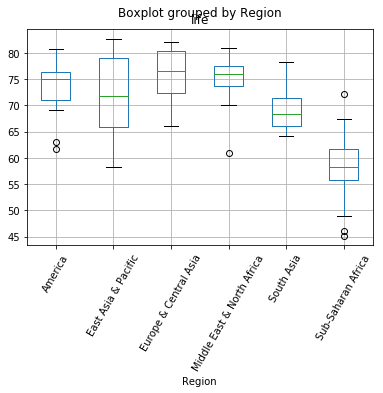

In [56]:
# Import pandas
import pandas as pd

# Read 'gapminder.csv' into a DataFrame: df
df = pd.read_csv('./data/gapminder.csv')

# Create a boxplot of life expectancy per region
df.boxplot('life', 'Region', rot=60)

# Show the plot
plt.show()

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Creating dummy variables</h1><p>As Andy discussed in the video, scikit-learn does not accept non-numerical features. You saw in the previous exercise that the <code>'Region'</code> feature contains very useful information that can predict life expectancy. For example, Sub-Saharan Africa has a lower life expectancy compared to Europe and Central Asia. Therefore, if you are trying to predict life expectancy, it would be preferable to retain the <code>'Region'</code> feature. To do this, you need to binarize it by creating dummy variables, which is what you will do in this exercise.</p></div>

In [57]:
# Create dummy variables: df_region
df_region = pd.get_dummies(df)

# Print the columns of df_region
print(df_region.columns)

# Create dummy variables with drop_first=True: df_region
df_region = pd.get_dummies(df, drop_first=True)

# Print the new columns of df_region
print(df_region.columns)

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_America',
       'Region_East Asia & Pacific', 'Region_Europe & Central Asia',
       'Region_Middle East & North Africa', 'Region_South Asia',
       'Region_Sub-Saharan Africa'],
      dtype='object')
Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region_East Asia & Pacific',
       'Region_Europe & Central Asia', 'Region_Middle East & North Africa',
       'Region_South Asia', 'Region_Sub-Saharan Africa'],
      dtype='object')


In [59]:
df_region.head()

population  fertility  HIV        CO2  BMI_male      GDP  BMI_female  life  \
0  34811059.0       2.73  0.1   3.328945  24.59620  12314.0    129.9049  75.3   
1  19842251.0       6.43  2.0   1.474353  22.25083   7103.0    130.1247  58.3   
2  40381860.0       2.24  0.5   4.785170  27.50170  14646.0    118.8915  75.5   
3   2975029.0       1.40  0.1   1.804106  25.35542   7383.0    132.8108  72.5   
4  21370348.0       1.96  0.1  18.016313  27.56373  41312.0    117.3755  81.5   

   child_mortality  Region_East Asia & Pacific  Region_Europe & Central Asia  \
0             29.5                           0                             0   
1            192.0                           0                             0   
2             15.4                           0                             0   
3             20.0                           0                             1   
4              5.2                           1                             0   

   Region_Middle East & North Africa  Region_South Asia  \
0                                  1                  0   
1                                  0                  0   
2                                  0                  0   
3                                  0                  0   
4                                  0                  0   

   Region_Sub-Saharan Africa  
0                          0  
1                          1  
2                          0  
3                          0  
4                          0

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Regression with categorical features</h1><p>Having created the dummy variables from the <code>'Region'</code> feature, you can build regression models as you did before. Here, you'll use ridge regression to perform 5-fold cross-validation.</p>
<p>The feature array <code>X</code> and target variable array <code>y</code> have been pre-loaded.</p></div>

In [60]:
# Import necessary modules
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Instantiate a ridge regressor: ridge
ridge = Ridge(alpha=0.5, normalize=True)

# Perform 5-fold cross-validation: ridge_cv
ridge_cv = cross_val_score(ridge, X,y, cv=5)

# Print the cross-validated scores
print(ridge_cv)

[0.26648172 0.23084647 0.27355543 0.24898795 0.25673452]


<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Dropping missing data</h1><p>The voting dataset from Chapter 1 contained a bunch of missing values that we dealt with for you behind the scenes. Now, it's time for you to take care of these yourself!</p>
<p>The unprocessed dataset has been loaded into a DataFrame <code>df</code>. Explore it in the IPython Shell with the <code>.head()</code> method. You will see that there are certain data points labeled with a <code>'?'</code>. These denote missing values. As you saw in the video, different datasets encode missing values in different ways. Sometimes it may be a <code>'9999'</code>, other times  a <code>0</code> - real-world data can be very messy! If you're lucky, the missing values will already be encoded as <code>NaN</code>. We use <code>NaN</code> because it is an efficient and simplified way of internally representing missing data, and it lets us take advantage of pandas methods such as <code>.dropna()</code> and <code>.fillna()</code>, as well as scikit-learn's Imputation transformer <code>Imputer()</code>.</p>
<p>In this exercise, your job is to convert the <code>'?'</code>s to NaNs, and then drop the rows that contain them from the DataFrame.</p></div>

In [62]:
df = pd.read_csv('./data/house-votes-84.csv', header=None)
df.columns= ['party', 'infants', 'water', 'budget', 'physician', 'salvador',
       'religious', 'satellite', 'aid', 'missile', 'immigration', 'synfuels',
       'education', 'superfund', 'crime', 'duty_free_exports', 'eaa_rsa']

In [63]:
# Convert '?' to NaN
df[df == '?'] = np.nan

# Print the number of NaNs
print(df.isnull().sum())

# Print shape of original DataFrame
print("Shape of Original DataFrame: {}".format(df.shape))

# Drop missing values and print shape of new DataFrame
df = df.dropna()

# Print shape of new DataFrame
print("Shape of DataFrame After Dropping All Rows with Missing Values: {}".format(df.shape))

party                  0
infants               12
water                 48
budget                11
physician             11
salvador              15
religious             11
satellite             14
aid                   15
missile               22
immigration            7
synfuels              21
education             31
superfund             25
crime                 17
duty_free_exports     28
eaa_rsa              104
dtype: int64
Shape of Original DataFrame: (435, 17)
Shape of DataFrame After Dropping All Rows with Missing Values: (232, 17)


<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Imputing missing data in a ML Pipeline I</h1><p>As you've come to appreciate, there are many steps to building a model, from creating training and test sets, to fitting a classifier or regressor, to tuning its parameters, to evaluating its performance on new data. Imputation can be seen as the first step of this machine learning process, the entirety of which can be viewed within the context of a pipeline. Scikit-learn provides a pipeline constructor that allows you to piece together these steps into one process and thereby simplify your workflow. </p>
<p>You'll now practice setting up a pipeline with two steps: the imputation step, followed by the instantiation of a classifier. You've seen three classifiers in this course so far: k-NN, logistic regression, and the decision tree. You will now be introduced to a fourth one - the Support Vector Machine, or <a href="http://scikit-learn.org/stable/modules/svm.html" target="_blank">SVM</a>. For now, do not worry about how it works under the hood. It works exactly as you would expect of the scikit-learn estimators that you have worked with previously, in that it has the same <code>.fit()</code> and <code>.predict()</code> methods as before.</p></div></div></div>

In [64]:
# Import the Imputer module
from sklearn.preprocessing import Imputer
from sklearn.svm import SVC

# Setup the Imputation transformer: imp
imp = Imputer(missing_values=('NaN'), strategy='most_frequent', axis=0)

# Instantiate the SVC classifier: clf
clf = SVC()

# Setup the pipeline with the required steps: steps
steps = [('imputation', imp),
        ('SVM', clf)]

<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Imputing missing data in a ML Pipeline II</h1><p>Having setup the steps of the pipeline in the previous exercise, you will now use it on the voting dataset to classify a Congressman's party affiliation. What makes pipelines so incredibly useful is the simple interface that they provide. You can use the <code>.fit()</code> and <code>.predict()</code> methods on pipelines just as you did with your classifiers and regressors! </p>
<p>Practice this for yourself now and generate a classification report of your predictions. The steps of the pipeline have been set up for you, and the feature array <code>X</code> and target variable array <code>y</code> have been pre-loaded. Additionally, <code>train_test_split</code> and <code>classification_report</code> have been imported from <code>sklearn.model_selection</code> and <code>sklearn.metrics</code> respectively.</p></div>

In [65]:
# Create arrays for the features and the response variable
y = df['party']
X = df.drop('party', axis=1)

In [66]:
df.head()

party infants water budget physician salvador religious satellite  \
5     democrat       0     1      0         0        1         0         0   
8   republican       0     1      0         1        0         1         0   
19    democrat       1     0      1         0        0         0         1   
23    democrat       1     0      1         0        0         0         1   
25    democrat       1     0      1         0        0         0         1   

   aid missile immigration synfuels education superfund crime  \
5    0       0           0        0         0         1     0   
8    0       0           0        0         1         0     1   
19   0       1           0        1         0         0     0   
23   0       1           0        0         0         0     0   
25   0       1           0        0         0         0     0   

   duty_free_exports eaa_rsa  
5                  1       1  
8                  0       1  
19                 1       1  
23                 1       1  
25                 1       1

In [67]:
# Import necessary modules
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# Setup the pipeline steps: steps
steps = [('imputation', Imputer(missing_values='NaN', strategy='most_frequent', axis=0)),
        ('SVM', SVC())]

# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the pipeline to the train set
pipeline.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = pipeline.predict(X_test)

# Compute metrics
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

   democrat       0.90      0.97      0.93        36
 republican       0.97      0.88      0.92        34

avg / total       0.93      0.93      0.93        70



<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Centering and scaling your data</h1><p>In the video, Hugo demonstrated how significantly the performance of a model can improve if the features are scaled. Note that this is not always the case: In the Congressional voting records dataset, for example, all of the features are binary. In such a situation, scaling will have minimal impact.</p>
<p>You will now explore scaling for yourself on a new dataset - <a href="https://archive.ics.uci.edu/ml/datasets/Wine+Quality" target="_blank">White Wine Quality</a>! Hugo used the Red Wine Quality dataset in the video. We have used the <code>'quality'</code> feature of the wine to create a binary target variable: If <code>'quality'</code> is less than <code>5</code>, the target variable is <code>1</code>, and otherwise, it is <code>0</code>.</p>
<p>The DataFrame has been pre-loaded as <code>df</code>, along with the feature and target variable arrays <code>X</code> and <code>y</code>. Explore it in the IPython Shell. Notice how some features seem to have different units of measurement. <code>'density'</code>, for instance, takes values between 0.98 and 1.04, while <code>'total sulfur dioxide'</code> ranges from 9 to 440. As a result, it may be worth scaling the features here. Your job in this exercise is to scale the features and compute the mean and standard deviation of the unscaled features compared to the scaled features.</p></div>

In [69]:
df = pd.read_csv('./data/winequality-red.csv', delimiter=';')
X = df.drop('quality', axis=1)
y = df['quality']

In [70]:
# Import scale
from sklearn.preprocessing import scale

# Scale the features: X_scaled
X_scaled = scale(X)

# Print the mean and standard deviation of the unscaled features
print("Mean of Unscaled Features: {}".format(np.mean(X))) 
print("Standard Deviation of Unscaled Features: {}".format(np.std(X)))

# Print the mean and standard deviation of the scaled features
print("Mean of Scaled Features: {}".format(np.mean(X_scaled))) 
print("Standard Deviation of Scaled Features: {}".format(np.std(X_scaled)))

Mean of Unscaled Features: fixed acidity            8.319637
volatile acidity         0.527821
citric acid              0.270976
residual sugar           2.538806
chlorides                0.087467
free sulfur dioxide     15.874922
total sulfur dioxide    46.467792
density                  0.996747
pH                       3.311113
sulphates                0.658149
alcohol                 10.422983
dtype: float64
Standard Deviation of Unscaled Features: fixed acidity            1.740552
volatile acidity         0.179004
citric acid              0.194740
residual sugar           1.409487
chlorides                0.047051
free sulfur dioxide     10.456886
total sulfur dioxide    32.885037
density                  0.001887
pH                       0.154338
sulphates                0.169454
alcohol                  1.065334
dtype: float64
Mean of Scaled Features: 2.546626531486538e-15
Standard Deviation of Scaled Features: 1.0


<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Centering and scaling in a pipeline</h1><p>With regard to whether or not scaling is effective, the proof is in the pudding! See for yourself whether or not scaling the features of the White Wine Quality dataset has any impact on its performance. You will use a k-NN classifier as part of a pipeline that includes scaling, and for the purposes of comparison, a k-NN classifier trained on the unscaled data has been provided. </p>
<p>The feature array and target variable array have been pre-loaded as <code>X</code> and <code>y</code>. Additionally, <code>KNeighborsClassifier</code> and <code>train_test_split</code> have been imported from <code>sklearn.neighbors</code> and <code>sklearn.model_selection</code>, respectively.</p></div>

In [71]:
# Import the necessary modules
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Setup the pipeline
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]
        
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the pipeline to the training set: knn_scaled
knn_scaled = pipeline.fit(X_train, y_train)

# Instantiate and fit a k-NN classifier to the unscaled data
knn_unscaled = KNeighborsClassifier().fit(X_train, y_train)

# Compute and print metrics
print('Accuracy with Scaling: {}'.format(knn_scaled.score(X_test, y_test)))
print('Accuracy without Scaling: {}'.format(knn_unscaled.score(X_test, y_test)))

Accuracy with Scaling: 0.5708333333333333
Accuracy without Scaling: 0.48541666666666666


<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Bringing it all together I: Pipeline for classification</h1><p>It is time now to piece together everything you have learned so far into a pipeline for classification! Your job in this exercise is to build a pipeline that includes scaling and hyperparameter tuning to classify wine quality.</p>
<p>You'll return to using the SVM classifier you were briefly introduced to earlier in this chapter. The hyperparameters you will tune are <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-32-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>C</mi></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-165" style="width: 0.911em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.748em; height: 0px; font-size: 117%;"><span style="position: absolute; clip: rect(1.485em, 1000.75em, 2.533em, -1000em); top: -2.35em; left: 0em;"><span class="mrow" id="MathJax-Span-166"><span class="mi" id="MathJax-Span-167" style="font-family: MathJax_Math; font-style: italic;">C<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.045em;"></span></span></span><span style="display: inline-block; width: 0px; height: 2.35em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.088em; border-left: 0px solid; width: 0px; height: 0.976em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>C</mi></math></span></span><script type="math/tex" id="MathJax-Element-32">C</script> and <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-33-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>g</mi><mi>a</mi><mi>m</mi><mi>m</mi><mi>a</mi></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-168" style="width: 3.902em; display: inline-block;"><span style="display: inline-block; position: relative; width: 3.312em; height: 0px; font-size: 117%;"><span style="position: absolute; clip: rect(1.748em, 1003.29em, 2.716em, -1000em); top: -2.35em; left: 0em;"><span class="mrow" id="MathJax-Span-169"><span class="mi" id="MathJax-Span-170" style="font-family: MathJax_Math; font-style: italic;">g<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.003em;"></span></span><span class="mi" id="MathJax-Span-171" style="font-family: MathJax_Math; font-style: italic;">a</span><span class="mi" id="MathJax-Span-172" style="font-family: MathJax_Math; font-style: italic;">m</span><span class="mi" id="MathJax-Span-173" style="font-family: MathJax_Math; font-style: italic;">m</span><span class="mi" id="MathJax-Span-174" style="font-family: MathJax_Math; font-style: italic;">a</span></span><span style="display: inline-block; width: 0px; height: 2.35em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.302em; border-left: 0px solid; width: 0px; height: 0.882em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>g</mi><mi>a</mi><mi>m</mi><mi>m</mi><mi>a</mi></math></span></span><script type="math/tex" id="MathJax-Element-33">gamma</script>. <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-34-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>C</mi></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-175" style="width: 0.911em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.748em; height: 0px; font-size: 117%;"><span style="position: absolute; clip: rect(1.485em, 1000.75em, 2.533em, -1000em); top: -2.35em; left: 0em;"><span class="mrow" id="MathJax-Span-176"><span class="mi" id="MathJax-Span-177" style="font-family: MathJax_Math; font-style: italic;">C<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.045em;"></span></span></span><span style="display: inline-block; width: 0px; height: 2.35em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.088em; border-left: 0px solid; width: 0px; height: 0.976em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>C</mi></math></span></span><script type="math/tex" id="MathJax-Element-34">C</script> controls the regularization strength. It is analogous to the <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-35-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>C</mi></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-178" style="width: 0.911em; display: inline-block;"><span style="display: inline-block; position: relative; width: 0.748em; height: 0px; font-size: 117%;"><span style="position: absolute; clip: rect(1.485em, 1000.75em, 2.533em, -1000em); top: -2.35em; left: 0em;"><span class="mrow" id="MathJax-Span-179"><span class="mi" id="MathJax-Span-180" style="font-family: MathJax_Math; font-style: italic;">C<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.045em;"></span></span></span><span style="display: inline-block; width: 0px; height: 2.35em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.088em; border-left: 0px solid; width: 0px; height: 0.976em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>C</mi></math></span></span><script type="math/tex" id="MathJax-Element-35">C</script> you tuned for logistic regression in Chapter 3, while <span class="MathJax_Preview" style="color: inherit; display: none;"></span><span class="MathJax" id="MathJax-Element-36-Frame" tabindex="0" style="position: relative;" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>g</mi><mi>a</mi><mi>m</mi><mi>m</mi><mi>a</mi></math>" role="presentation"><nobr aria-hidden="true"><span class="math" id="MathJax-Span-181" style="width: 3.902em; display: inline-block;"><span style="display: inline-block; position: relative; width: 3.312em; height: 0px; font-size: 117%;"><span style="position: absolute; clip: rect(1.748em, 1003.29em, 2.716em, -1000em); top: -2.35em; left: 0em;"><span class="mrow" id="MathJax-Span-182"><span class="mi" id="MathJax-Span-183" style="font-family: MathJax_Math; font-style: italic;">g<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.003em;"></span></span><span class="mi" id="MathJax-Span-184" style="font-family: MathJax_Math; font-style: italic;">a</span><span class="mi" id="MathJax-Span-185" style="font-family: MathJax_Math; font-style: italic;">m</span><span class="mi" id="MathJax-Span-186" style="font-family: MathJax_Math; font-style: italic;">m</span><span class="mi" id="MathJax-Span-187" style="font-family: MathJax_Math; font-style: italic;">a</span></span><span style="display: inline-block; width: 0px; height: 2.35em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.302em; border-left: 0px solid; width: 0px; height: 0.882em;"></span></span></nobr><span class="MJX_Assistive_MathML" role="presentation"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>g</mi><mi>a</mi><mi>m</mi><mi>m</mi><mi>a</mi></math></span></span><script type="math/tex" id="MathJax-Element-36">gamma</script> controls the kernel coefficient: Do not worry about this now as it is beyond the scope of this course. </p>
<p>The following modules have been pre-loaded: <code>Pipeline</code>, <code>svm</code>, <code>train_test_split</code>, <code>GridSearchCV</code>, <code>classification_report</code>, <code>accuracy_score</code>. The feature and target variable arrays <code>X</code> and <code>y</code> have also been pre-loaded.</p></div>

In [72]:
# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('SVM', SVC())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

# Instantiate the GridSearchCV object: cv
cv = GridSearchCV(pipeline,param_grid=parameters)

# Fit to the training set
cv.fit(X_train, y_train)

# Predict the labels of the test set: y_pred
y_pred = cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(cv.best_params_))

Accuracy: 0.60625
             precision    recall  f1-score   support

          3       0.00      0.00      0.00         1
          4       0.00      0.00      0.00        16
          5       0.62      0.79      0.69       127
          6       0.57      0.63      0.60       131
          7       0.75      0.29      0.41        42
          8       0.00      0.00      0.00         3

avg / total       0.58      0.61      0.57       320

Tuned Model Parameters: {'SVM__C': 1, 'SVM__gamma': 0.1}


<div class="exercise--assignment exercise--typography"><h1 class="exercise--title">Bringing it all together II: Pipeline for regression</h1><p>For this final exercise, you will return to the Gapminder dataset. Guess what? Even this dataset has missing values that we dealt with for you in earlier chapters! Now, you have all the tools to take care of them yourself! </p>
<p>Your job is to build a pipeline that imputes the missing data, scales the features, and fits an ElasticNet to the Gapminder data. You will then tune the <code>l1_ratio</code> of your ElasticNet using GridSearchCV.</p>
<p>All the necessary modules have been imported, and the feature and target variable arrays have been pre-loaded as <code>X</code> and <code>y</code>.</p></div>

In [73]:
# Setup the pipeline steps: steps
steps = [('imputation', Imputer(missing_values='NaN', strategy='mean', axis=0)),
         ('scaler', StandardScaler()),
         ('elasticnet', ElasticNet())]
         
# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'elasticnet__l1_ratio':np.linspace(0,1,30)}

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Create the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(pipeline, parameters)

# Fit to the training set
gm_cv.fit(X_train, y_train)

# Compute and print the metrics
r2 = gm_cv.score(X_test, y_test)
print("Tuned ElasticNet Alpha: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))

Tuned ElasticNet Alpha: {'elasticnet__l1_ratio': 0.0}
Tuned ElasticNet R squared: 0.2915333748100891
